In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder

In [2]:
filename = 'C:/Users/Lenovo/Documents/medical-records-10-yrs/encounter_dx.csv'
df = pd.read_csv(filename)
df.head()

,Provider_Org,code,vocab,description,severity,Encounter_ID
0,ExactData Medical Health System,401.9,ICD9,Hypertension,mild,L8694502508698944760
1,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN,M3204724885018391695
2,ExactData Medical Health System,496,ICD9,Chronic Obstructive Pulmonary Disease,critical,C2819614934032019919
3,ExactData Medical Health System,401.9,ICD9,Hypertension,mild,S4571692645992867370
4,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN,J6262874375300991101


In [3]:
df.code.unique()

array(['401.9', 'V70.0', '496', '431', '250.01', '584.9', '590.8',
       '585.9', '250', '428', '780.99', '890.1', 'V49.77', 'V57.1',
       '410.9', 'V49.67', '943.45', '592', '434.11', 'V49.73', 'V58.32',
       '892.1', 'V20.2'], dtype=object)

In [4]:
df.Provider_Org.unique()

array(['ExactData Medical Health System'], dtype=object)

In [5]:
df.Encounter_ID.unique()

array(['L8694502508698944760', 'M3204724885018391695',
       'C2819614934032019919', ..., 'Q8056614651118506333',
       'S3609661337043817833', 'G1694990956422422302'], dtype=object)

## Exploring Data and Removing missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Provider_Org  3063 non-null   object
 1   code          3063 non-null   object
 2   vocab         3063 non-null   object
 3   description   3063 non-null   object
 4   severity      2367 non-null   object
 5   Encounter_ID  3063 non-null   object
dtypes: object(6)
memory usage: 143.7+ KB


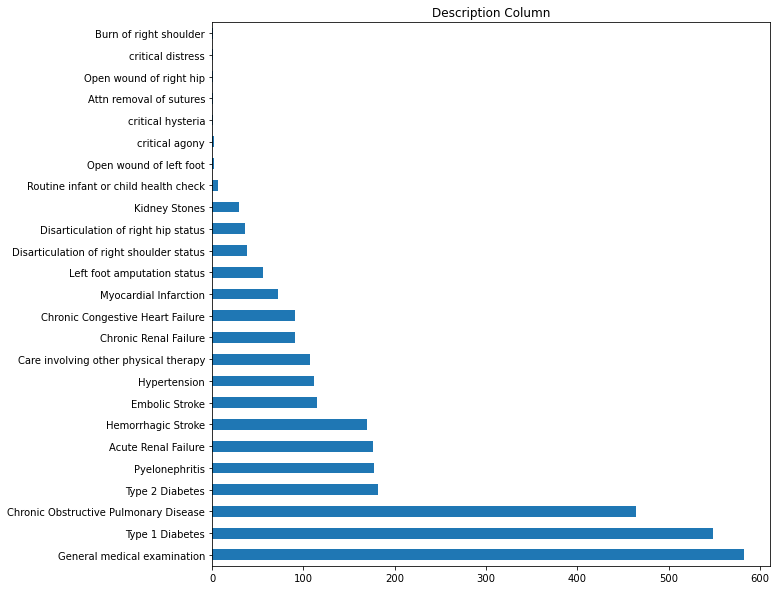

In [7]:
#description entries
plt.figure(figsize=(10,10))
x = df.description.value_counts()
x.plot(kind='barh')
plt.title('Description Column')
plt.show()

In [8]:
##checking missing values
df.isnull().sum()

Provider_Org      0
code              0
vocab             0
description       0
severity        696
Encounter_ID      0
dtype: int64

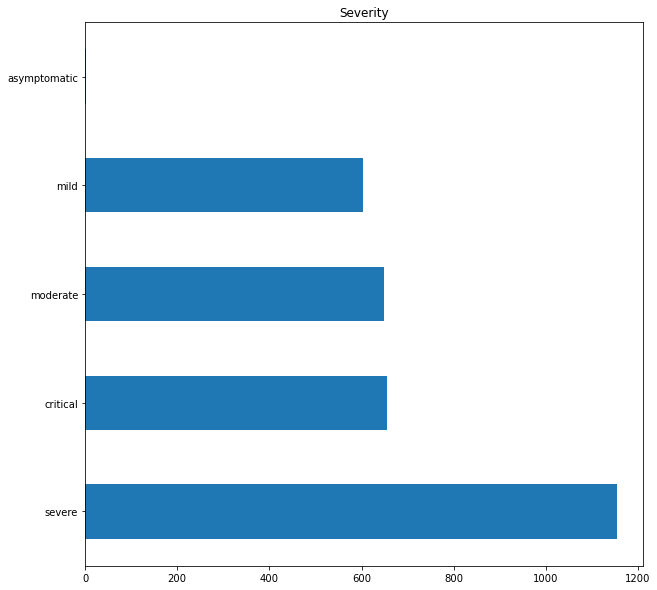

In [9]:
df['severity'] = df['severity'].replace()
plt.figure(figsize=(10,10))
x = df.severity.value_counts()
x.plot(kind='barh')
plt.title('Severity')
plt.show()

In [10]:
##encoding columns like severity and description for better analysis

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'severity'.
df['severity']= label_encoder.fit_transform(df['severity'])
  
df['severity'].unique()

array([2, 1, 4, 3, 0])

In [11]:
df['description']= label_encoder.fit_transform(df['description'])
  
df['description'].unique()
# o_col = ['Provider_Org', 'code', 'vocab']
df['Provider_Org'] = label_encoder.fit_transform(df['Provider_Org'])
df['code'] = label_encoder.fit_transform(df['code'])
df['vocab'] = label_encoder.fit_transform(df['vocab'])

col = ['description', 'severity'] 

In [12]:
mat = df[col].values
mat = np.array(mat)
# Using sklearn
km = sklearn.cluster.KMeans(n_clusters=8)
y_means = km.fit_predict(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([df.index,labels]).T

<IPython.core.display.Javascript object>

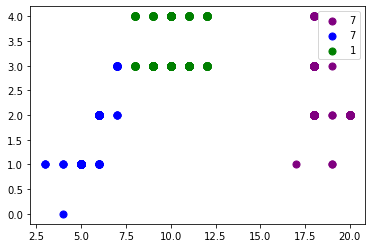

In [13]:
##scatter plots to find clusters of some points
plt.scatter(mat[y_means==0,0],mat[y_means==0,1],s=50, c='purple',label=labels[0])
plt.scatter(mat[y_means==1,0],mat[y_means==1,1],s=50, c='blue',label=labels[1])
plt.scatter(mat[y_means==2,0],mat[y_means==2,1],s=50, c='green',label=labels[2])
plt.legend()

# New File

In [14]:
filename = 'C:/Users/Lenovo/Documents/medical-records-10-yrs/lab_results.csv'
lab_df = pd.read_csv(filename)
lab_df.head()

,Provider_Org,Member_ID,Date_Collected,Test_ID,Specialty,Panel,Test_LOINC,Test_Name,Date_Resulted,Specimen,...,Result_Name,Result_Status,Result_Description,Numeric_Result,Units,Abnormal_Value,Reference_Range,Order_ID,Provider_ID,Encounter_ID
0,ExactData Medical Health System,568001602-01,2005-07-05T15:54:00Z,050705 CH 76296541,NaN,False,2093-3,Cholesterol,2005-07-05T20:33:41Z,NaN,...,Cholesterol,FINAL,Cholesterol=250 mg/dL,250,mg/dL,NaN,NaN,050630-30199,695700114,X3228783097331248888
1,ExactData Medical Health System,568001602-01,2005-10-07T16:15:00Z,051007 CH 47988013,NaN,False,21440-3,HPV I/H Risk DNA Probe,2005-10-07T20:10:41Z,NaN,...,HPV test,FINAL,negative for HPV 16 & 18,NaN,NaN,NaN,NaN,NaN,663746638,M3204724885018391695
2,ExactData Medical Health System,568001602-01,2005-10-07T16:15:00Z,051007 CH 04421087,NaN,False,28631-0,Visual Acuity Study,2005-10-07T17:57:09Z,NaN,...,acuity,FINAL,"right eye 20/20, left eye 20/20",NaN,NaN,NaN,NaN,NaN,663746638,M3204724885018391695
3,ExactData Medical Health System,568001602-01,2005-10-12T21:33:00Z,051012 CH 48885833,NaN,True,24331-1,Lipid Profile,2005-10-12T23:11:57Z,NaN,...,Total cholesterol,FINAL,Total cholesterol = 180mg/dL,180,mg/dL,NaN,NaN,051007-54352,695700114,G7012345417035113309
4,ExactData Medical Health System,568001602-01,2005-10-12T21:33:00Z,051012 CH 48885833,NaN,True,24331-1,Lipid Profile,2005-10-12T23:11:57Z,NaN,...,LDL,FINAL,LDL = 120mg/dL,120,mg/dL,NaN,NaN,051007-54352,695700114,G7012345417035113309


In [15]:
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7509 entries, 0 to 7508
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Provider_Org        7509 non-null   object 
 1   Member_ID           7509 non-null   object 
 2   Date_Collected      7509 non-null   object 
 3   Test_ID             7509 non-null   object 
 4   Specialty           0 non-null      float64
 5   Panel               7509 non-null   bool   
 6   Test_LOINC          7509 non-null   object 
 7   Test_Name           7509 non-null   object 
 8   Date_Resulted       7509 non-null   object 
 9   Specimen            0 non-null      float64
 10  Result_LOINC        7509 non-null   object 
 11  Result_Name         7509 non-null   object 
 12  Result_Status       7509 non-null   object 
 13  Result_Description  7509 non-null   object 
 14  Numeric_Result      2890 non-null   object 
 15  Units               2794 non-null   object 
 16  Abnorm

In [16]:
lab_df.isnull().sum()

Provider_Org             0
Member_ID                0
Date_Collected           0
Test_ID                  0
Specialty             7509
Panel                    0
Test_LOINC               0
Test_Name                0
Date_Resulted            0
Specimen              7509
Result_LOINC             0
Result_Name              0
Result_Status            0
Result_Description       0
Numeric_Result        4619
Units                 4715
Abnormal_Value        7509
Reference_Range       7509
Order_ID              1499
Provider_ID              0
Encounter_ID             0
dtype: int64

In [17]:
##removing columns that contain all missing values
cols = ['Specialty', 'Specimen', 'Abnormal_Value','Reference_Range']
lab_df = lab_df.drop(cols, axis=1)

In [20]:
##removing NaN values from remaining cols
cols = ['Numeric_Result', 'Units','Order_ID']
lab_df['Numeric_Result'] = lab_df['Numeric_Result'].dropna(how='any')
lab_df['Units'] = lab_df['Units'].dropna(how='any')
lab_df['Order_ID'] = lab_df['Order_ID'].dropna(how='any')

## New File

In [2]:
filename = 'C:/Users/Lenovo/Documents/medical-records-10-yrs/medication_fulfillment.csv'
med_df = pd.read_csv(filename)
med_df.head()

,Provider_Org,Order_ID,Member_ID,Prescription,Pharmacist_ID,Pharmacy_Name,Dispense_Date,Drug_Name,Drug_NDC,Sig,Dispense_Qty,Fill_No,Fill_Status,Dose,Units,Days_Of_Supply,Encounter_ID
0,ExactData Medical Health System,050630-23852,568001602-01,RX80452720,523808810,Corner Drug Store,2005-07-02T00:14:00Z,Hydrochlorothiazide,0172-2089-80,po qd,90,1,dispensed,50,mg,90,V3046573432409333612
1,ExactData Medical Health System,050312-01255,937650000-01,RX66597665,581395544,Family Health,2005-03-12T04:37:00Z,OMS 50,65689-001-21,via nasal cannula (contin),4320,1,dispensed,6,h,1,C2819614934032019919
2,ExactData Medical Health System,050419-86521,937650000-01,RX29972012,125920412,Wegmans,2005-04-22T06:53:00Z,Hydrochlorothiazide,0172-2089-80,po qd,90,1,dispensed,50,mg,90,N6421143613871277479
3,ExactData Medical Health System,050826-36597,666214171-01,RX35391014,381663534,Apothecary Shop,2005-08-28T04:01:00Z,Prednisone,54569-0332-3,orally,20,1,dispensed,20,mg,20,L1660181935005579193
4,ExactData Medical Health System,050228-72970,666383984-01,RX45661465,152383446,Corner Drug Store,2005-03-03T19:42:00Z,protamine sulfate,63323-229-30,/90 units of heparin overdosage,1,1,dispensed,1,mg,1,U1554150386761469892


## Understanding the Dataset

In [3]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider_Org    1176 non-null   object
 1   Order_ID        1176 non-null   object
 2   Member_ID       1176 non-null   object
 3   Prescription    1176 non-null   object
 4   Pharmacist_ID   1176 non-null   int64 
 5   Pharmacy_Name   1176 non-null   object
 6   Dispense_Date   1176 non-null   object
 7   Drug_Name       1176 non-null   object
 8   Drug_NDC        1176 non-null   object
 9   Sig             1176 non-null   object
 10  Dispense_Qty    1176 non-null   object
 11  Fill_No         1176 non-null   int64 
 12  Fill_Status     1176 non-null   object
 13  Dose            1176 non-null   object
 14  Units           1176 non-null   object
 15  Days_Of_Supply  1176 non-null   int64 
 16  Encounter_ID    1176 non-null   object
dtypes: int64(3), object(14)
memory usage: 156.3+ KB


In [4]:
#checking for any missing values in the dataframe
med_df.isnull().sum()

Provider_Org      0
Order_ID          0
Member_ID         0
Prescription      0
Pharmacist_ID     0
Pharmacy_Name     0
Dispense_Date     0
Drug_Name         0
Drug_NDC          0
Sig               0
Dispense_Qty      0
Fill_No           0
Fill_Status       0
Dose              0
Units             0
Days_Of_Supply    0
Encounter_ID      0
dtype: int64

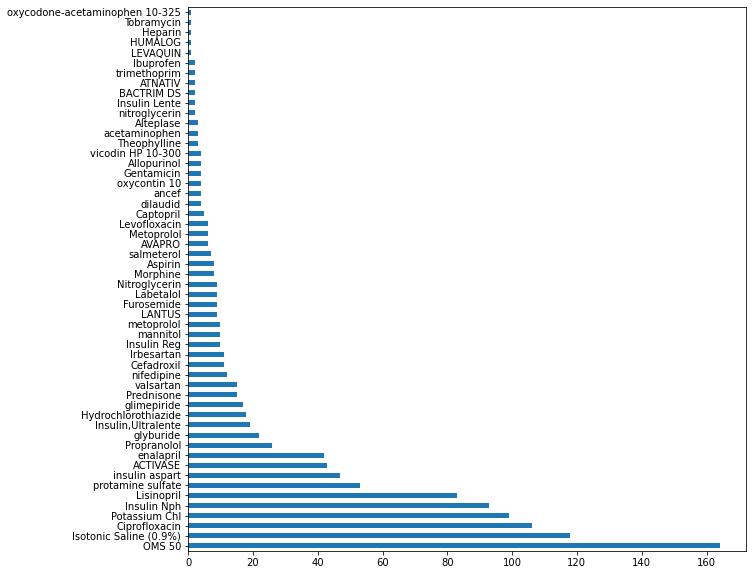

In [9]:
##checking col Drug name to see possible labelencoding approach
plt.figure(figsize=(10,10))
med_df['Drug_Name'].value_counts().plot(kind='barh')
plt.show()

So, from above majority of Drugs used were OMS 50, Now lets check the fill status

In [10]:
med_df['Fill_Status'].unique()

array(['dispensed'], dtype=object)

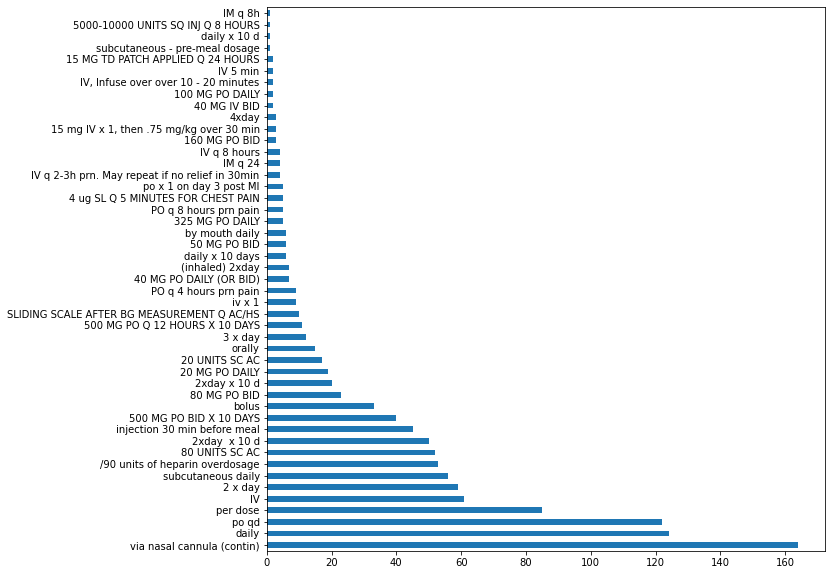

In [16]:
plt.figure(figsize=(10,10))
med_df['Sig'].value_counts().plot(kind='barh')
plt.show()

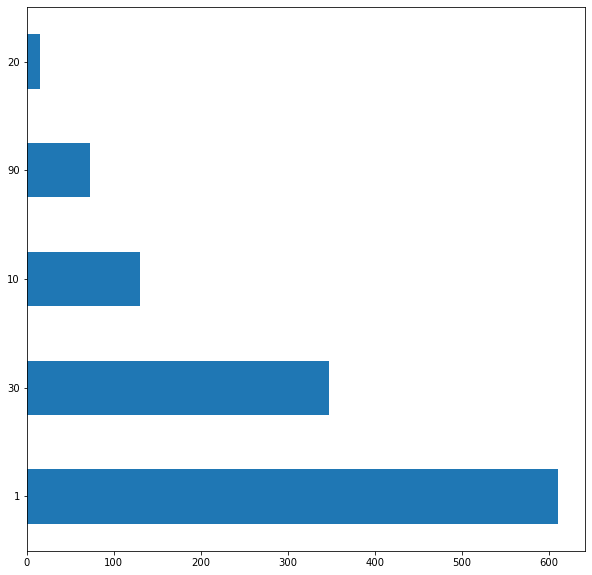

In [17]:
plt.figure(figsize=(10,10))
med_df['Days_Of_Supply'].value_counts().plot(kind='barh')
plt.show()